In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("magic04.csv")
df = df.drop_duplicates()
df = df.rename(columns = {"class":"Class"})
X = df.iloc[:,:10]
y = df.iloc[:,10:]
Class = y.Class.unique()
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(np.ravel(y)), columns = y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
pt = PowerTransformer(method = "yeo-johnson")
pt.fit(X_train)
X_train = pd.DataFrame(pt.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(pt.transform(X_test), columns = X.columns)

# Logistic Regression

In [3]:
Logit = LogisticRegressionCV(cv=10, scoring='accuracy', n_jobs=-1, max_iter = 100)
Logit.fit(X_train, np.ravel(y_train))
y_pred = Logit.predict(X_test)

In [4]:
pd.DataFrame(data = Logit.coef_, columns = X.columns)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,1.383869,-0.189867,1.455469,1.421105,0.218006,-0.049338,-0.292599,-0.018409,1.586697,0.037657


Columns with Higher Coefficients are More Important (fLength, fSize, fConc, fAlpha). Others with low coefficient are less important.

In [5]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Class))

[[2292  201]
 [ 421  867]]
              precision    recall  f1-score   support

           g       0.84      0.92      0.88      2493
           h       0.81      0.67      0.74      1288

    accuracy                           0.84      3781
   macro avg       0.83      0.80      0.81      3781
weighted avg       0.83      0.84      0.83      3781



In [6]:
from sklearn import metrics

In [7]:
fpr, tpr, _ = metrics.roc_curve(y_test,  Logit.predict_proba(X_test)[:,1])

In [8]:
metrics.auc(fpr, tpr)

0.8745026446721628

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y_test, y_pred)

0.8354932557524465

In [11]:
auc_logit = pd.DataFrame(data = {"fpr":fpr,"tpr":tpr})

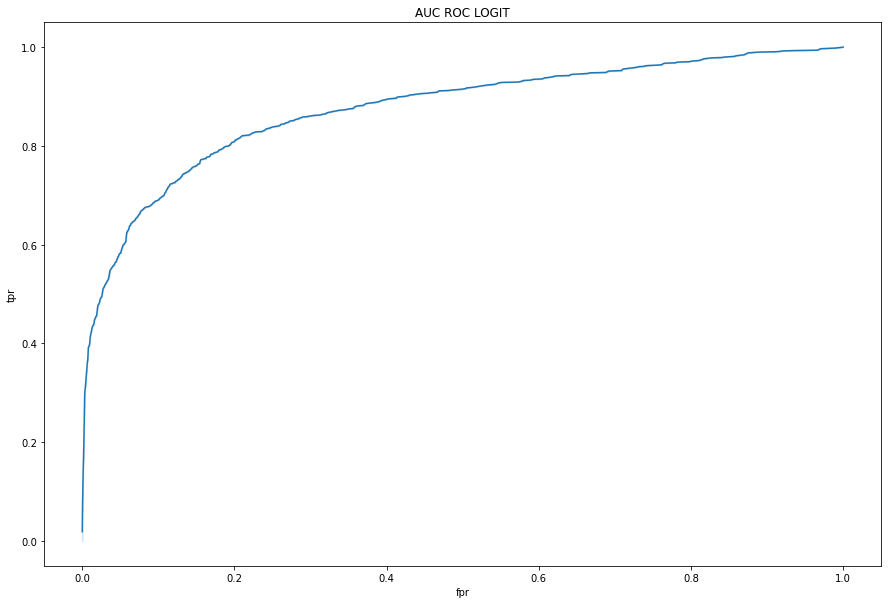

In [12]:
plt.figure(figsize = (15,10))
plot = sns.lineplot(x='fpr', y='tpr', data=auc_logit).set(title='AUC ROC LOGIT')

# LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
LDA = LinearDiscriminantAnalysis()

In [15]:
LDA.fit(X_train, np.ravel(y_train))
y_pred = LDA.predict(X_test)

In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Class))

[[2290  203]
 [ 439  849]]
              precision    recall  f1-score   support

           g       0.84      0.92      0.88      2493
           h       0.81      0.66      0.73      1288

    accuracy                           0.83      3781
   macro avg       0.82      0.79      0.80      3781
weighted avg       0.83      0.83      0.83      3781



In [17]:
fpr, tpr, _ = metrics.roc_curve(y_test,  LDA.predict_proba(X_test)[:,1])

In [18]:
metrics.auc(fpr, tpr)

0.8740526268583089

In [19]:
accuracy_score(y_test, y_pred)

0.8302036498280878

In [20]:
auc_LDA = pd.DataFrame(data = {"fpr":fpr,"tpr":tpr})

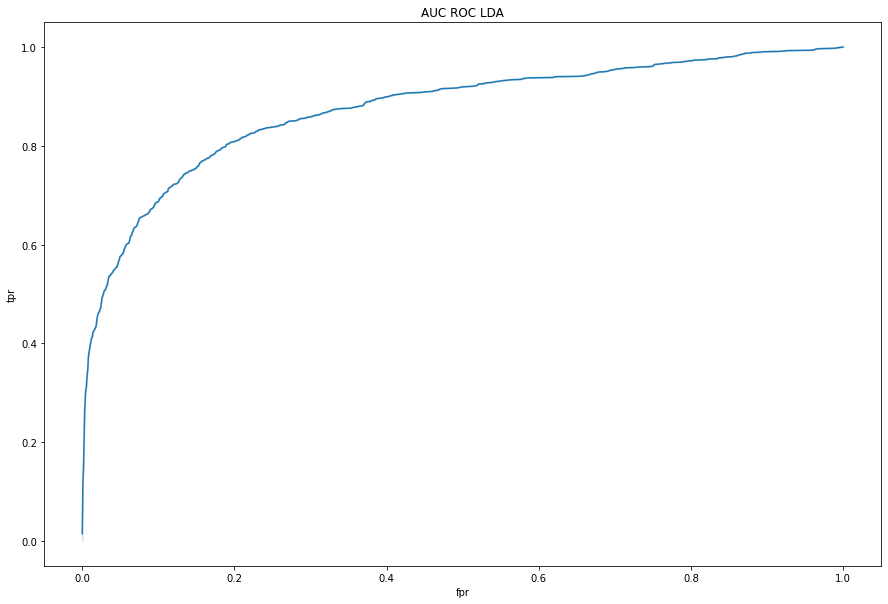

In [21]:
plt.figure(figsize = (15,10))
plot = sns.lineplot(x='fpr', y='tpr', data=auc_LDA).set(title='AUC ROC LDA')

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={"n_neighbors": range(1, 21), "weights":["uniform","distance"], "p":[1, 2]},
    scoring=scoring,
    refit="AUC",
    return_train_score=True,
    n_jobs = -1,
    cv = 10,
    verbose = 3
)
gs.fit(X_train, np.ravel(y_train))
results = gs.cv_results_

In [ ]:
gs.best_params_

In [23]:
KNN = KNeighborsClassifier(n_neighbors=20, p = 2, weights = "distance")
KNN.fit(X_train, np.ravel(y_train))
y_pred = KNN.predict(X_test)

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Class))

[[2421   72]
 [ 457  831]]
              precision    recall  f1-score   support

           g       0.84      0.97      0.90      2493
           h       0.92      0.65      0.76      1288

    accuracy                           0.86      3781
   macro avg       0.88      0.81      0.83      3781
weighted avg       0.87      0.86      0.85      3781



In [25]:
fpr, tpr, _ = metrics.roc_curve(y_test,  KNN.predict_proba(X_test)[:,1])

In [26]:
metrics.auc(fpr, tpr)

0.9197065447850254

In [27]:
accuracy_score(y_test, y_pred)

0.8600899233007141

In [28]:
auc_KNN = pd.DataFrame(data = {"fpr":fpr,"tpr":tpr})

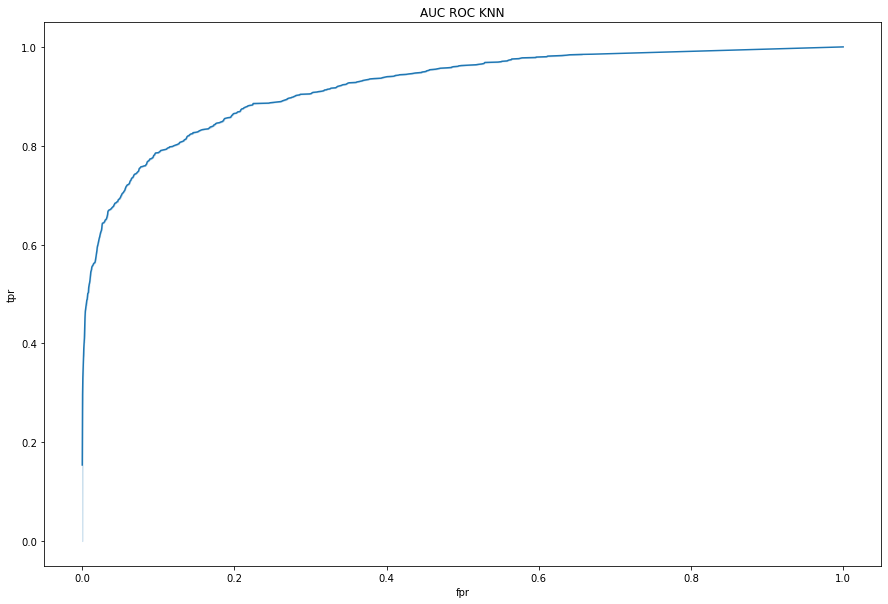

In [29]:
plt.figure(figsize = (15,10))
plot = sns.lineplot(x='fpr', y='tpr', data=auc_KNN).set(title='AUC ROC KNN')

# Linear SVM

In [30]:
from sklearn.svm import SVC

In [ ]:
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
cv = StratifiedShuffleSplit(n_splits=30, test_size=0.2, random_state=101)

In [ ]:
grid = GridSearchCV(SVC(kernel = "linear", max_iter=10000, probability=True), param_grid=param_grid, cv=cv, n_jobs = -1, verbose = 3)

In [ ]:
grid.fit(X_train, np.ravel(y_train))

In [ ]:
results = grid.cv_results_

In [ ]:
grid.best_params_

In [31]:
LSVC = SVC(kernel = "linear", max_iter=10000, C = 0.1, probability = True)
LSVC.fit(X_train, np.ravel(y_train))
y_pred = LSVC.predict(X_test)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Class))

[[2329  164]
 [ 450  838]]
              precision    recall  f1-score   support

           g       0.84      0.93      0.88      2493
           h       0.84      0.65      0.73      1288

    accuracy                           0.84      3781
   macro avg       0.84      0.79      0.81      3781
weighted avg       0.84      0.84      0.83      3781



In [33]:
fpr, tpr, _ = metrics.roc_curve(y_test,  LSVC.predict_proba(X_test)[:,1])

In [34]:
metrics.auc(fpr, tpr)

0.8726321900077983

In [35]:
accuracy_score(y_test, y_pred)

0.8376090981221899

In [36]:
auc_LSVC = pd.DataFrame(data = {"fpr":fpr,"tpr":tpr})

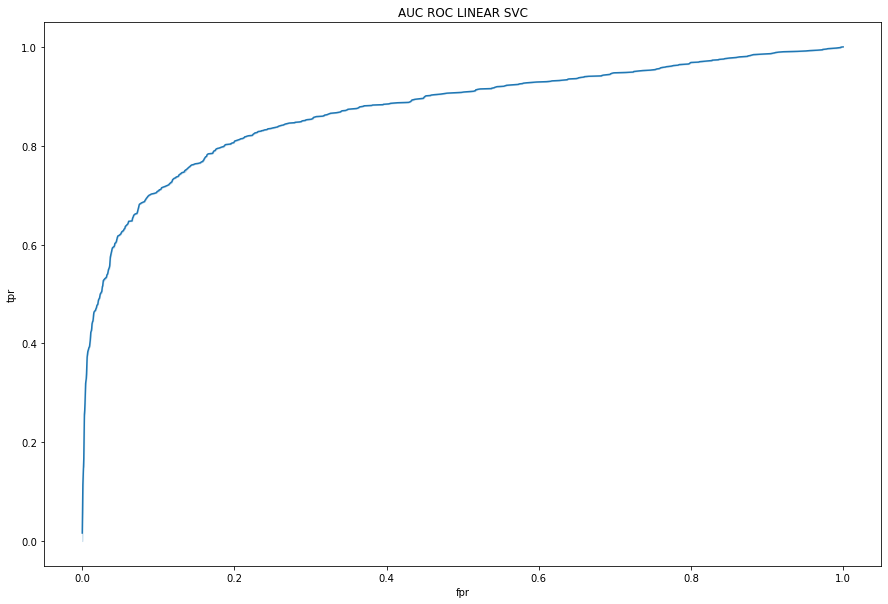

In [37]:
plt.figure(figsize = (15,10))
plot = sns.lineplot(x='fpr', y='tpr', data=auc_LSVC).set(title='AUC ROC LINEAR SVC')

# Radial SVC

In [ ]:
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=101)
grid = GridSearchCV(SVC(probability = True), param_grid=param_grid, cv=cv, n_jobs = -1, verbose = 3)

In [ ]:
grid.fit(X_train, np.ravel(y_train))

In [ ]:
results = grid.cv_results_

In [ ]:
grid.best_params_

In [38]:
RSVC = SVC(C = 100, gamma = 0.1, probability = True)
RSVC.fit(X_train, np.ravel(y_train))
y_pred = RSVC.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Class))

[[2389  104]
 [ 318  970]]
              precision    recall  f1-score   support

           g       0.88      0.96      0.92      2493
           h       0.90      0.75      0.82      1288

    accuracy                           0.89      3781
   macro avg       0.89      0.86      0.87      3781
weighted avg       0.89      0.89      0.89      3781



In [40]:
fpr, tpr, _ = metrics.roc_curve(y_test,  RSVC.predict_proba(X_test)[:,1])

In [41]:
metrics.auc(fpr, tpr)

0.9290217578162955

In [42]:
accuracy_score(y_test, y_pred)

0.8883893149960328

In [43]:
auc_RSVC = pd.DataFrame(data = {"fpr":fpr,"tpr":tpr})

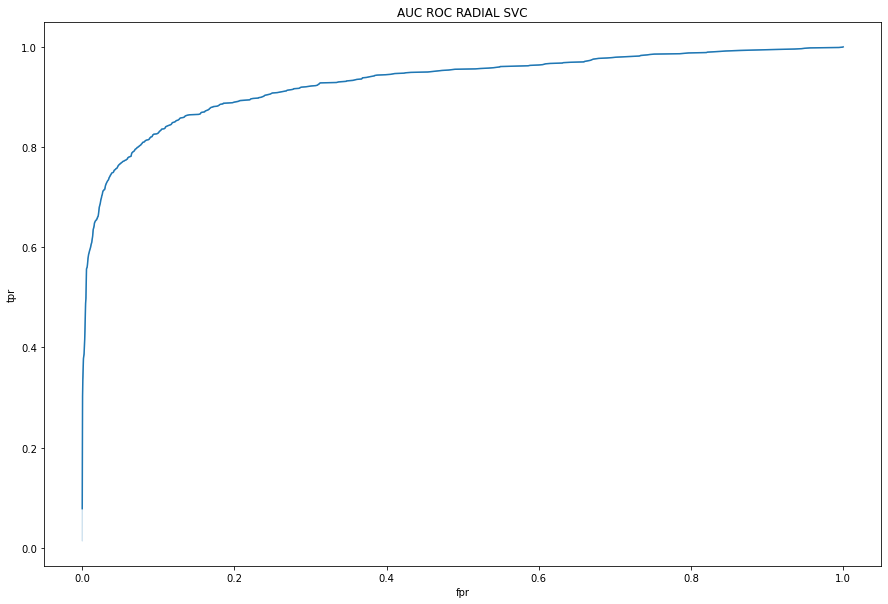

In [44]:
plt.figure(figsize = (15,10))
plot = sns.lineplot(x='fpr', y='tpr', data=auc_RSVC).set(title='AUC ROC RADIAL SVC')